do not save model for default, if train new model, set parameter "save_model = True"

Training for the 0th time
Training for the 1th time
Training for the 2th time
Training for the 3th time
Training for the 4th time
Training for the 5th time
Training for the 6th time
Training for the 7th time
Training for the 8th time
Training for the 9th time
Training for the 10th time
Training for the 11th time
Training for the 12th time
Training for the 13th time
Training for the 14th time
Training for the 15th time
Training for the 16th time
Training for the 17th time
Training for the 18th time
Training for the 19th time
Training for the 20th time
Training for the 21th time
Training for the 22th time
Training for the 23th time
Training for the 24th time
Training for the 25th time
Training for the 26th time
Training for the 27th time
Training for the 28th time
Training for the 29th time
Training for the 30th time
Training for the 31th time
Training for the 32th time
Training for the 33th time
Training for the 34th time
Training for the 35th time
Training for the 36th time
Training fo

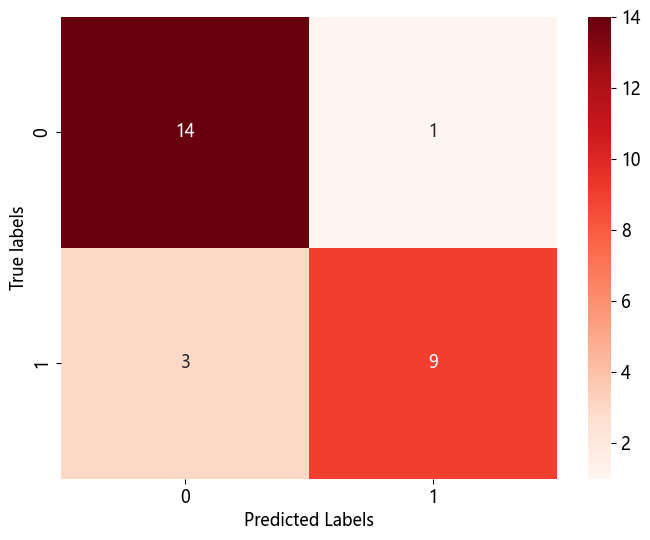

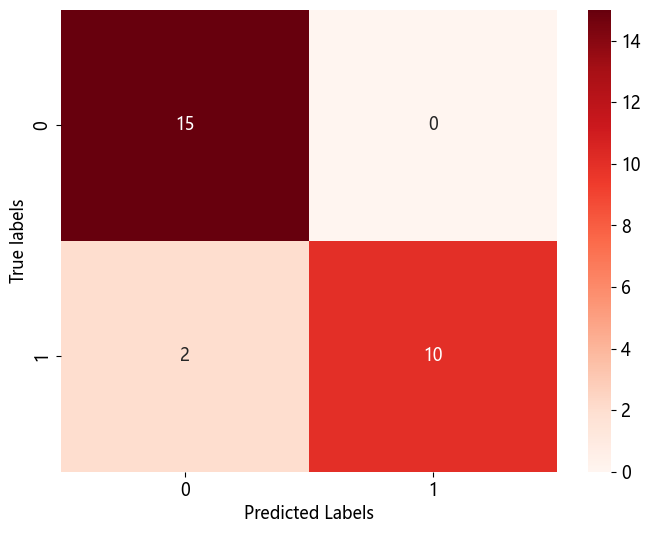

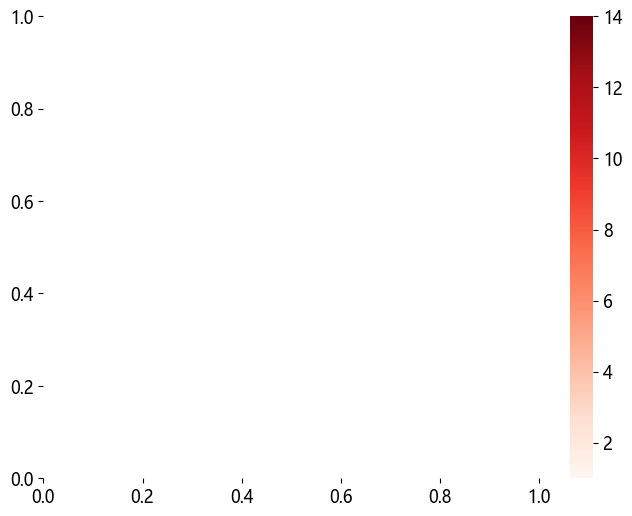

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.ensemble import  RandomForestClassifier
import pydotplus
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import warnings  
warnings.filterwarnings('ignore')
import joblib
import os 
import shutil
from glob import glob
from openpyxl import load_workbook
from utils import *
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] 
plt.rcParams['font.size'] = 12  
plt.rcParams['axes.unicode_minus'] = False
excel='../Dataset_Process/Dataset/final_data.xlsx'
sheet_name='data_labeled_shuffle'

save_model = False
# sheet_name='data_labeled'
data=pd.read_excel(excel,sheet_name=sheet_name)
data=data.fillna(0)
datasets=data[data['label'].isin([0,1])]
data_target=data['label']
feature_names=['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
               'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
               'FP/Or','FNS/FPr']
data_features_part=data[feature_names]
epoch_num=100
n_splits=3
StrK=StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=20)
n_split=StrK.get_n_splits(data_features_part,data_target)  #Number of splits is set to 10
# print(data[feature_names].values[:,0])
score=[]
main_path='2label'
if save_model:
    create_dir(main_path,is_mainpath=True)
    create_dir(main_path+'/report')
    create_dir(main_path+'/model')
    create_dir(main_path+'/confusion_matrix')
    create_dir(main_path+'/Feature importance of different models')

f1_score_ls=[]

ls1=['fold'+str(i) for i in range(n_splits)]

fold_dict=dict(zip(ls1,[0 for i in range(len(ls1))]))

train=True


# print(fold_dict)
# split_index
# for i,(train_index,test_index) in enumerate(StrK.split(data_features_part,data_target)):
#     fold_dict['fold'+str(i)]=test_index
# print(fold_dict)

if train==True:
    for n in range(epoch_num):
    # Cross-validation part
        print(f'Training for the {n}th time') 
    clf=RandomForestClassifier(criterion='gini',n_estimators=30,max_features='log2',max_depth=6,max_samples=None)
    f1_score_sum=0
    for i,(train_index,test_index) in enumerate(StrK.split(data_features_part,data_target)):
        # pass
        # print(f'-------------Fold {i} cross-validation-----------')
        fold_dict['fold'+str(i)]=train_index

        x_train=data[feature_names].values[train_index]
        y_train=data['label'].values[train_index]

        x_test=data[feature_names].values[test_index]
        y_test=data['label'].values[test_index]

        clf.fit(x_train,y_train)

        test_predict=clf.predict(x_test)
        f1_score=metrics.f1_score(y_test,test_predict)
        # recall=metrics.recall_score(y_test,test_predict)


        # print(f'Fold {i} f1_score=',f1_score)
        report=metrics.classification_report(y_test,test_predict)

        f1_score_sum+=f1_score

        plt.figure(figsize=(8,6))  # The optimal size for plotting a confusion matrix is (8,6) or a similar ratio
        confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test,labels=data['label'].unique())
        sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True labels')
        if save_model:
            plt.savefig(f'{main_path}/confusion_matrix(temp)/Model prediction confusion matrix {i}.jpg')
        # print('Generated confusion matrix image')
        # plt.show()     
        # Save model file
        if save_model:
            joblib.dump(clf,main_path+'/model(temp)/'+f'model{i}.pkl')
        # print('Saved model file')
    
        # Print report
        if save_model:
            file=open(main_path+f'/report(temp)/report{i}.txt','w')
            file.write(report)
        if i==n_splits-1:
            if len(f1_score_ls)==0 or f1_score_sum>max(f1_score_ls)*n_splits:
                print(f'Training for the {n}th time, average f1_score',f1_score_sum/n_splits)
                f1_score_ls.append(f1_score_sum/n_splits)
                print('Final fold classification situation\n',report)
                if save_model:
                    mycopydir(main_path+'/model(temp)',main_path+'/model')
                    mycopydir(main_path+'/report(temp)',main_path+'/report')
                    mycopydir(main_path+'/confusion_matrix(temp)',main_path+'/confusion_matrix')
                    file=open(main_path+f'/report/report{i}.txt','w')
                    file.write(report)

                    ls=list(fold_dict.values())
                    df=pd.DataFrame(ls)
                    book=load_workbook(excel)
                    with pd.ExcelWriter(excel) as writer:
                        writer.book=book
                        df.to_excel(writer,sheet_name='k-fold')
                    df=pd.read_excel(excel,sheet_name='k-fold')
                    print('Training set indices:',list(df))
plt.cla()

Get model interpretability from trained models, change the main path as the Model path , like ../Models_and_Results/trained_Models/MOR